## Finite Overlapping Mixture Model with Binary clusters

In [2]:
%load_ext autoreload
%autoreload 2
import utils, iomm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from matplotlib import pyplot as plt 
import numpy as np

### Synthetic Data

In [72]:
#Generate synthetic data
K=12
N=100
copy_rows=40
D=8
N_iter=400
alpha_prior = 5
burning_period=100

Z = utils.random_z(N,K)
X = utils.random_x(N,D)
theta= utils.random_theta(N,K,D,alpha_prior)

#### IOMM algorithm

In [73]:
IOMM = iomm.IOMM(N = N, 
                 K = K, 
                 D = D, 
                 N_iter = N_iter, 
                 Z = Z, 
                 X = X, 
                 theta = theta, 
                 alpha_prior = alpha_prior, 
                 omega = 1,
                 copy_rows = copy_rows,
                 burning_period=burning_period)

In [74]:
%%capture
Z_hat,theta_resampled,Z_hat_mean,U_hat = IOMM.learning(random_walk=True)

In [75]:
theta_evol=np.zeros([N_iter,K*D])
theta_evol_mean=np.zeros([N_iter,K*D])
temp=0
ind_evol=0
for n in range(N_iter):
    ind_evol=0
    for d in range(D):
        for k in range(K):
            theta_evol[n,ind_evol]=theta_resampled[n][k,d]
            ind_evol=ind_evol+1

for n in range(N_iter):
    for ind in range(K*D):
        theta_evol_mean[n,ind]=np.sum(theta_evol[:n,ind])/(n+1)

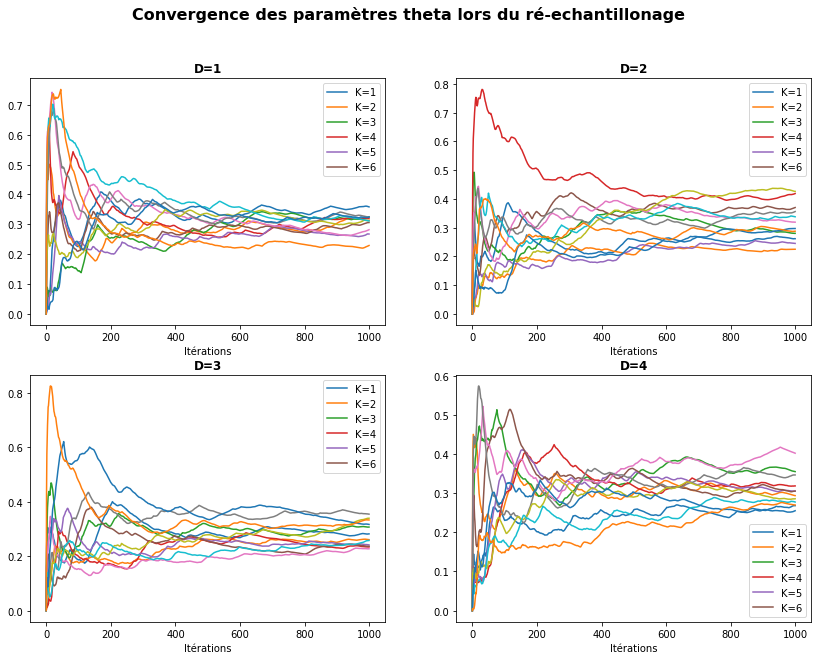

In [76]:
fig=plt.figure(figsize=(14,10))

for d in range(D-4):
    ax=fig.add_subplot(2,2,d+1)
    for kd in range(K*(d),K*(d+1)):
        ax.plot(range(N_iter),theta_evol_mean[:,kd])
        plt.legend(["K=1","K=2","K=3","K=4","K=5","K=6"])
        plt.title("D="+str(d+1),fontweight='bold')
        #plt.xlim(0,1000)
        plt.xlabel("Itérations")
plt.suptitle("Convergence des paramètres theta lors du ré-echantillonage",fontweight='bold',size=16)
plt.show()

In [63]:
#we compute the U matrix N*N showing the number of shared clusters between each data point
#U_hat=np.around(np.dot(Z_hat_mean,Z_hat_mean.T),0)
print(np.around(U_hat))
U=np.dot(Z,Z.T)
#print(U)

[[ 2.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


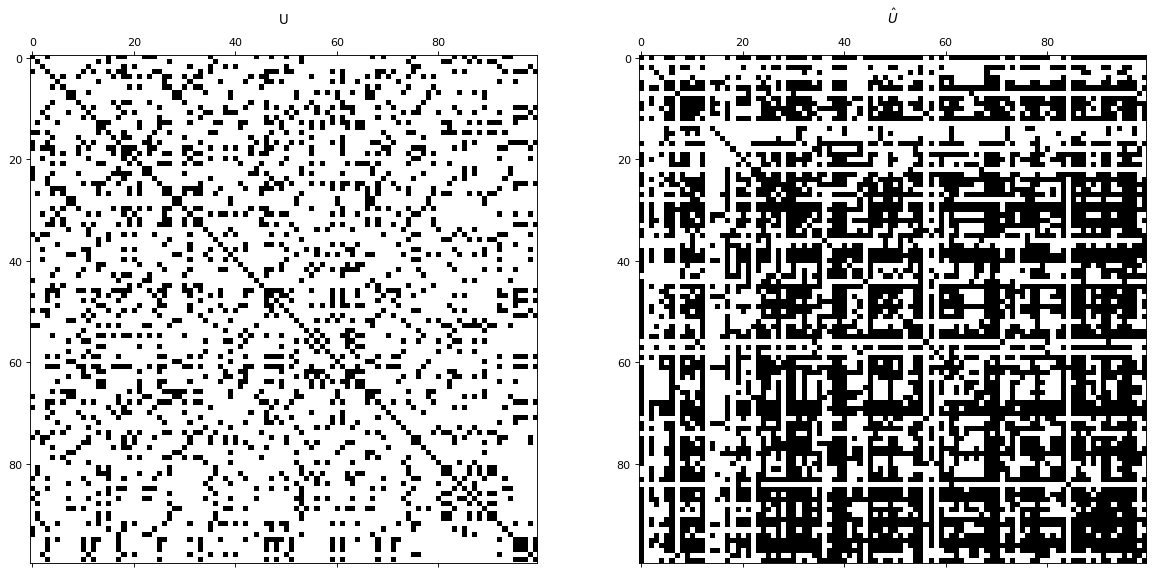

In [64]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.title.set_text('U')
ax2.title.set_text('$\hat{U}$')

ax1.spy(U)
ax2.spy(U_hat)

plt.show()

In [65]:
#summmary statistics
U_diff=abs(U-U_hat)
print("% of pairs having same number of clusters:",len(U_diff[U_diff==0])/(N*N))
print("% of pairs having at most 1 cluster difference:",len(U_diff[U_diff<2])/(N*N))
print("% of pairs having at most 2 clusters difference:",len(U_diff[U_diff<3])/(N*N))
print("% of pairs having at most 3 clusters difference:",len(U_diff[U_diff<4])/(N*N))

% of pairs having same number of clusters: 0.4048
% of pairs having at most 1 cluster difference: 0.9939
% of pairs having at most 2 clusters difference: 0.9986
% of pairs having at most 3 clusters difference: 0.9999
